In [268]:
import numpy as np
import pandas as pd
import time
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [269]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [270]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


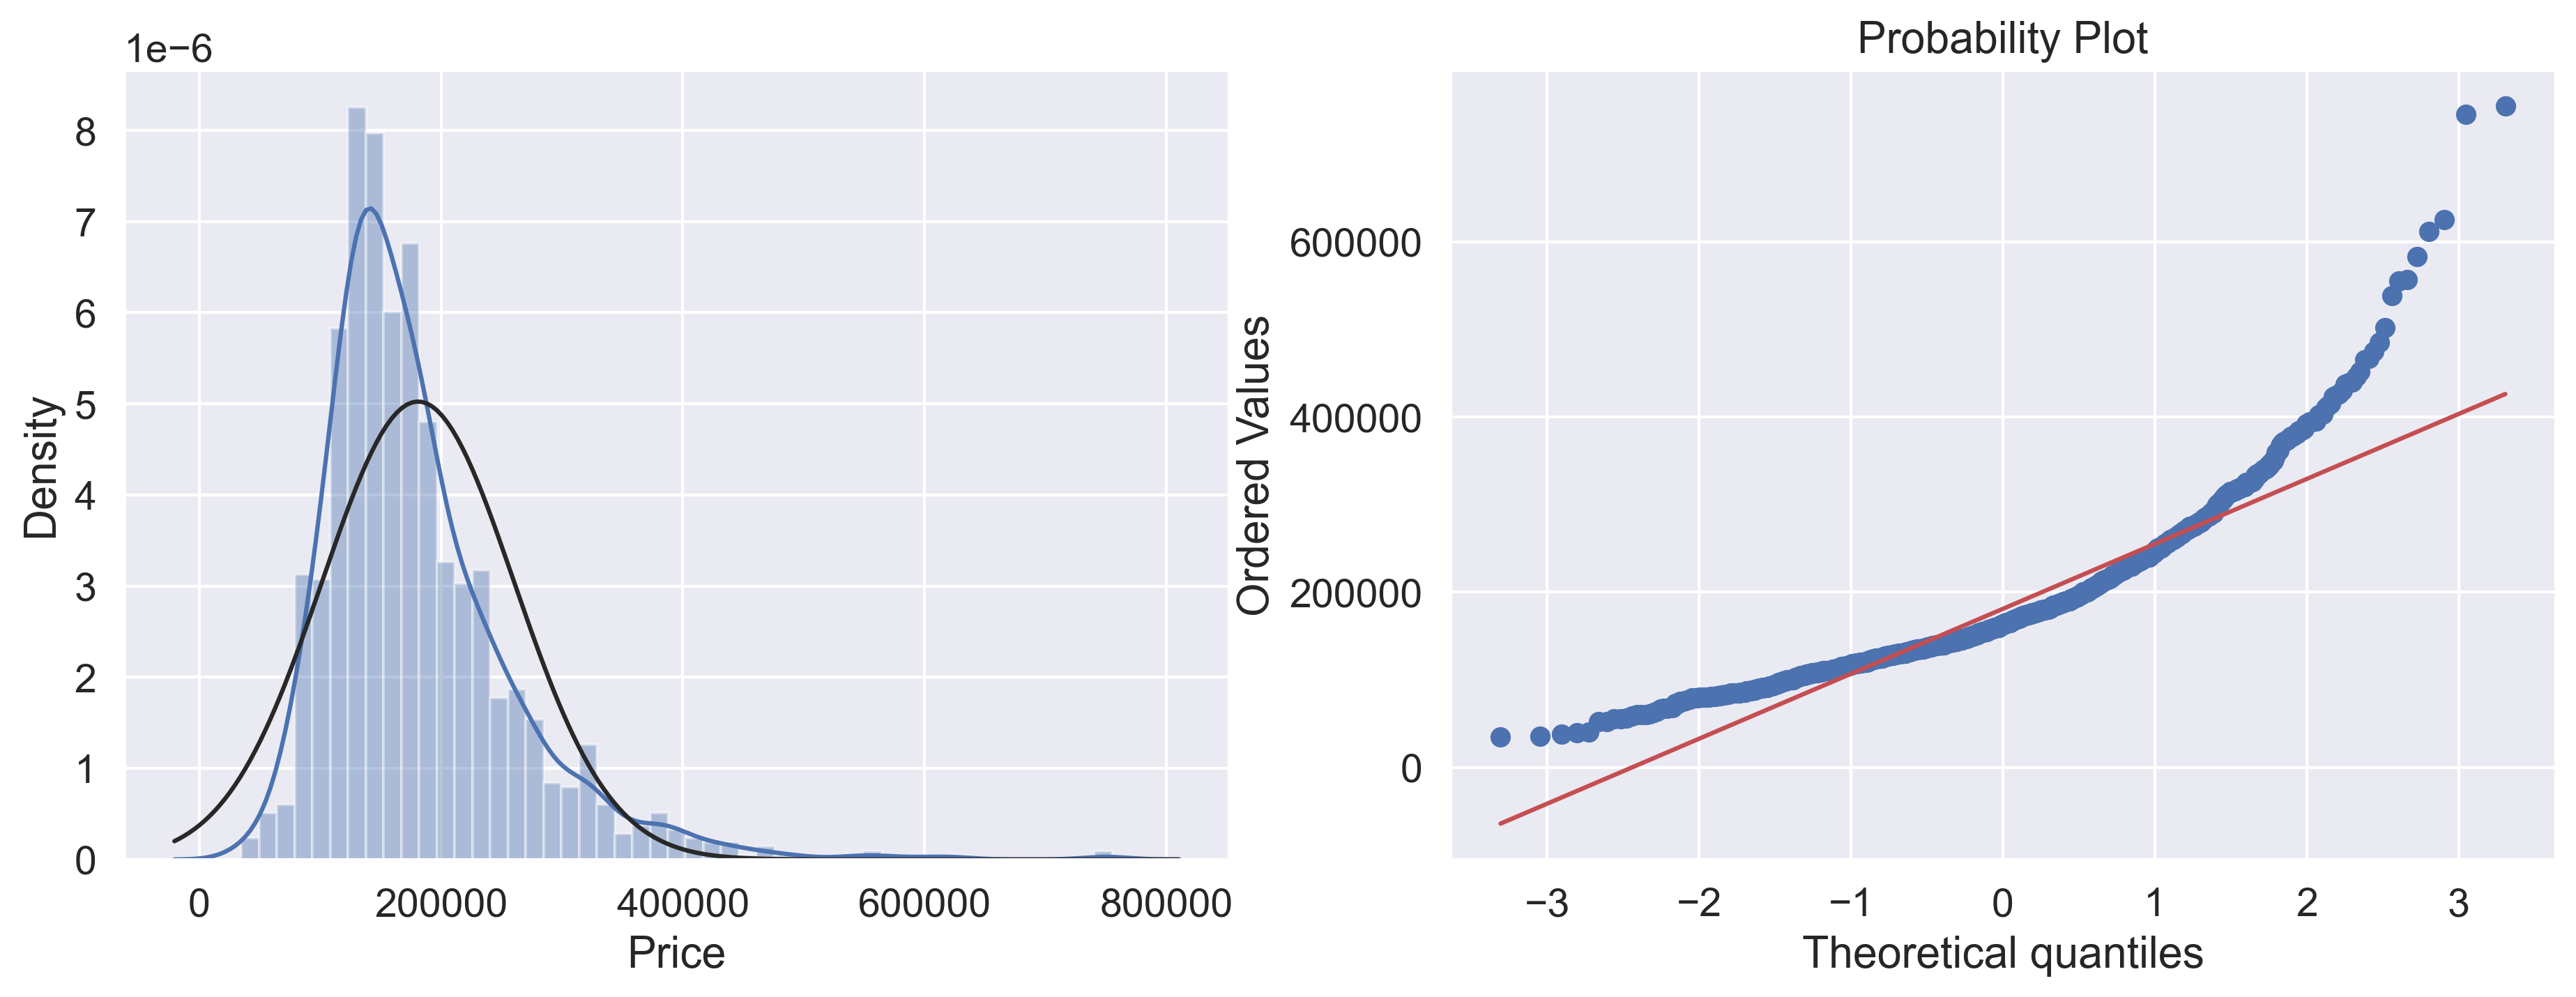

In [271]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)
sns.distplot(df_train['Price'], fit = stats.norm, ax = ax1)
stats.probplot(df_train['Price'], plot=ax2)
plt.show()

In [272]:
null_count = df_train.isnull().sum()

<AxesSubplot:>

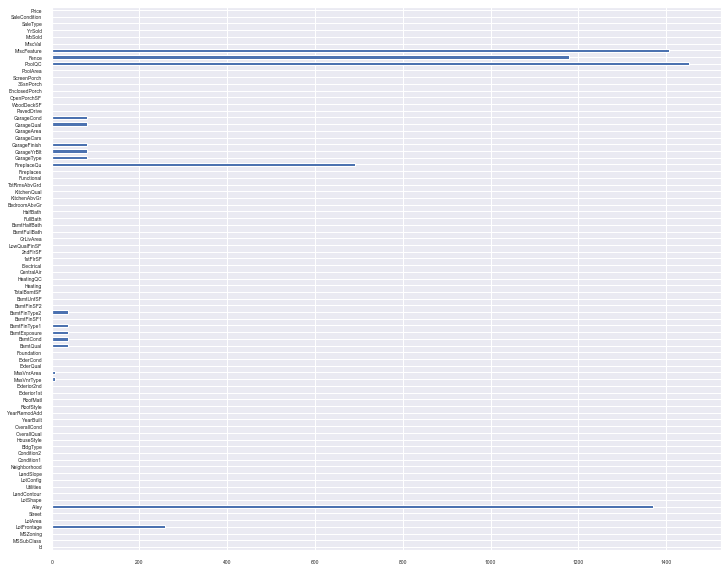

In [273]:
null_count.plot(kind = "barh", figsize=(12,10), fontsize = 5)

In [274]:
df_train.Price.isnull().sum()

0

In [275]:
df_train.groupby([df_train.MSZoning,df_train.Price]).mean()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  \
MSZoning Price                                                           
C (all)  34900    496.0        30.0         60.0   7879.0          4.0   
         35311    917.0        20.0         50.0   9000.0          2.0   
         40000     31.0        70.0         50.0   8500.0          4.0   
         55993    813.0        20.0         66.0   8712.0          5.0   
         68400   1280.0        50.0         60.0   7500.0          4.0   
...                 ...         ...          ...      ...          ...   
RM       275000  1406.0       120.0         44.0   3842.0          8.0   
         295000   305.0        75.0         87.0  18386.0          7.0   
         325000   584.0        75.0         75.0  13500.0         10.0   
         392500  1182.0       120.0         64.0   5587.0          8.0   
         475000   186.0        75.0         90.0  22950.0         10.0   

                 OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
MSZoning Price                                                                  
C (all)  34900           5.0     1920.0        1950.0         0.0       495.0   
         35311           3.0     1949.0        1950.0         0.0        50.0   
         40000           4.0     1920.0        1950.0         0.0         0.0   
         55993           5.0     1952.0        1952.0         0.0         0.0   
         68400           4.0     1920.0        1950.0         0.0         0.0   
...                      ...        ...           ...         ...         ...   
RM       275000          5.0     2004.0        2005.0       174.0      1373.0   
         295000          9.0     1880.0        2002.0         0.0         0.0   
         325000          9.0     1893.0        2000.0         0.0         0.0   
         392500          5.0     2008.0        2008.0       186.0      1480.0   
         475000          9.0     1892.0        1993.0         0.0         0.0   

                 ...  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
MSZoning Price   ...                                                       
C (all)  34900   ...         0.0         0.0        523.0          115.0   
         35311   ...       308.0         0.0          0.0            0.0   
         40000   ...       250.0         0.0         54.0          172.0   
         55993   ...       504.0         0.0          0.0            0.0   
         68400   ...       528.0        30.0          0.0          164.0   
...              ...         ...         ...          ...            ...   
RM       275000  ...       482.0       128.0         53.0            0.0   
         295000  ...       870.0       302.0          0.0            0.0   
         325000  ...       880.0       105.0        502.0            0.0   
         392500  ...       482.0       162.0         53.0            0.0   
         475000  ...       840.0         0.0        260.0            0.0   

                 3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
MSZoning Price                                                              
C (all)  34900         0.0          0.0       0.0      0.0    11.0  2009.0  
         35311         0.0          0.0       0.0      0.0    10.0  2006.0  
         40000         0.0          0.0       0.0      0.0     7.0  2008.0  
         55993         0.0          0.0       0.0     54.0     6.0  2010.0  
         68400         0.0          0.0       0.0      0.0     4.0  2010.0  
...                    ...          ...       ...      ...     ...     ...  
RM       275000        0.0        155.0       0.0      0.0     1.0  2008.0  
         295000        0.0          0.0       0.0      0.0     5.0  2008.0  
         325000        0.0          0.0       0.0      0.0     7.0  2008.0  
         392500      153.0          0.0       0.0      0.0    11.0  2008.0  
         475000        0.0        410.0       0.0      0.0     6.0  2006.0  

[807 rows x 3

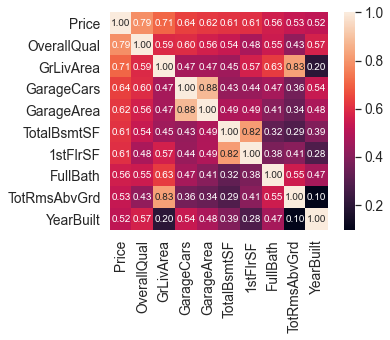

In [276]:
k = 10
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

## Handeling Non-Numeric Data

In [277]:
def handel_non_numeric_data(df_train):
    df = pd.DataFrame(df_train)
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
    return df

In [278]:
df_new_train = handel_non_numeric_data(df_train)
df_new_test = handel_non_numeric_data(df_test)

In [279]:
df_new_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1,60,0,65.0,8450,0,0,2,2,0,...,0,0,0,0,0,2,2008,1,0,208500
1,2,20,0,80.0,9600,0,0,2,2,0,...,0,0,0,0,0,5,2007,1,0,181500
2,3,60,0,68.0,11250,0,0,0,2,0,...,0,0,0,0,0,9,2008,1,0,223500
3,4,70,0,60.0,9550,0,0,0,2,0,...,0,0,0,0,0,2,2006,1,3,140000
4,5,60,0,84.0,14260,0,0,0,2,0,...,0,0,0,0,0,12,2008,1,0,250000


### Shuffling The Data

In [280]:
from sklearn.utils import shuffle
df_new_train = shuffle(df_new_train)

In [281]:
df_new_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
738,739,90,0,60.0,10800,0,0,2,2,0,...,0,0,0,0,0,3,2009,1,2,179000
21,22,45,2,57.0,7449,0,2,2,0,0,...,0,0,1,0,0,6,2007,1,0,139400
33,34,20,0,70.0,10552,0,0,0,2,0,...,0,0,0,0,0,4,2010,1,0,165500
1086,1087,160,2,NaN,1974,0,0,2,2,0,...,0,0,0,0,0,5,2010,1,0,83500
683,684,20,0,90.0,11248,0,0,0,2,0,...,0,0,0,0,0,7,2007,1,0,285000


### Importing Machine Learning Related Stuff

In [290]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from tqdm import tqdm
from sklearn import preprocessing, model_selection

### Handeling NULL Values

In [283]:
for i in df_new_train:
    if df_new_train[i].isnull().sum() > 0:
        df_new_train[i].fillna(df_new_train[i].median(), inplace = True)
df_new_train.isnull().sum()

for i in df_new_test:
    if df_new_test[i].isnull().sum() > 0:
        df_new_test[i].fillna(df_new_test[i].median(), inplace = True)
# df_new_train.isnull().sum()

In [284]:
df_new_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
738,739,90,0,60.0,10800,0,0,2,2,0,...,0,0,0,0,0,3,2009,1,2,179000
21,22,45,2,57.0,7449,0,2,2,0,0,...,0,0,1,0,0,6,2007,1,0,139400
33,34,20,0,70.0,10552,0,0,0,2,0,...,0,0,0,0,0,4,2010,1,0,165500
1086,1087,160,2,69.0,1974,0,0,2,2,0,...,0,0,0,0,0,5,2010,1,0,83500
683,684,20,0,90.0,11248,0,0,0,2,0,...,0,0,0,0,0,7,2007,1,0,285000


In [341]:
x_train = (df_new_train.drop(['Price','Id'], 1))
# x_train = preprocessing.scale(x_train)
x_test = (df_new_test.drop(['Id'], 1))
y_train = (df_new_train['Price'].values)

In [357]:
len(x_test)

1459

In [358]:
slr.score(x_train, y_train)

0.8421081972890943

In [360]:
def logreg():
    logreg = LogisticRegression()
    tqdm(logreg.fit(x_train,y_train))
    logreg.score(x_train,y_train)

In [363]:
def xgb():
    clf = xgb.XGBClassifier(
        n_estimators=500,
        max_depth=15,
        learning_rate=0.9,
        subsample=0.99,
        colsample_bytree=0.99,
        missing=-999,
        random_state=20
    )
    return clf

clf.fit(x_train,y_train)
clf.score(x_train,y_train)

0.9986301369863013

In [375]:
def randomforest():
    model = RandomForestClassifier(n_estimators=450,random_state=20)
    return model
model.fit(x_train, y_train)
model.score(x_train,y_train)

1.0

In [376]:
y_test = model.predict(x_test)

In [377]:
y_test

array([129000, 151500, 167500, ..., 168000,  93500, 250000], dtype=int64)

In [378]:
sub = pd.DataFrame({'Id':df_test['Id'].values, 'SalePrice':y_test})
sub

,Id,SalePrice
0,1461,129000
1,1462,151500
2,1463,167500
3,1464,167500
4,1465,180000
...,...,...
1454,2915,75000
1455,2916,88000
1456,2917,168000
1457,2918,93500


In [379]:
sub.to_csv('./submission.csv', index = False)